In [ ]:
%pip install ipywidgets
%pip install git+https://github.com/andr3w003/gossipy

## Inizio simulazione

### Inizializzazione dei nodi e dei modelli

In [1]:
from gossipy.core import AntiEntropyProtocol, CreateModelMode, StaticP2PNetwork
from gossipy.data import load_classification_dataset, DataDispatcher
from gossipy.data.handler import ClassificationDataHandler
from gossipy.model.handler import PegasosHandler
from gossipy.model.nn import AdaLine
from gossipy.node import GossipNode
from gossipy.simul import GossipSimulator, SimulationReport
from gossipy.utils import plot_evaluation

X, y = load_classification_dataset("spambase", as_tensor=True)
y = 2*y - 1 #convert 0/1 labels to -1/1

data_handler = ClassificationDataHandler(X, y, test_size=.1)
data_dispatcher = DataDispatcher(data_handler, n=100, eval_on_user=False, auto_assign=True)

topology = StaticP2PNetwork(num_nodes=data_dispatcher.size(), topology=None)

model_handler = PegasosHandler(net=AdaLine(data_handler.size(1)),
                               learning_rate=.01,
                               create_model_mode=CreateModelMode.MERGE_UPDATE)

nodes = GossipNode.generate(data_dispatcher=data_dispatcher,
                            p2p_net=topology,
                            model_proto=model_handler,
                            round_len=100,
                            sync=False)

100925-20:19:30 INFO     Downloading dataset spambase from                                          ]8;id=716615;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\data\__init__.py\__init__.py]8;;\:]8;id=91516;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\data\__init__.py#609\609]8;;\
                         'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spamba                
                         se.data'.                                                                                 

### Simulazione senza cifratura

100925-20:19:33 INFO     Simulation started.                                                           ]8;id=191602;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py\simul.py]8;;\:]8;id=748077;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py#404\404]8;;\

Output()

100925-20:21:00 INFO     # Sent messages: 20508                                                        ]8;id=20094;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py\simul.py]8;;\:]8;id=102846;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py#254\254]8;;\

                INFO     # Failed messages: 0                                                          ]8;id=914525;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py\simul.py]8;;\:]8;id=955450;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py#255\255]8;;\

                INFO     Total size: 1168956                                                           ]8;id=522401;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py\simul.py]8;;\:]8;id=822344;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py#256\256]8;;\

                INFO     accuracy: 0.92                                                                ]8;id=286260;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py\utils.py]8;;\:]8;id=792214;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py#181\181]8;;\

                INFO     precision: 0.92                                                               ]8;id=728698;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py\utils.py]8;;\:]8;id=719211;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py#181\181]8;;\

                INFO     recall: 0.91                                                                  ]8;id=321084;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py\utils.py]8;;\:]8;id=289240;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py#181\181]8;;\

                INFO     f1_score: 0.92                                                                ]8;id=977575;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py\utils.py]8;;\:]8;id=279562;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py#181\181]8;;\

                INFO     auc: 0.97                                                                     ]8;id=924645;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py\utils.py]8;;\:]8;id=205814;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py#181\181]8;;\

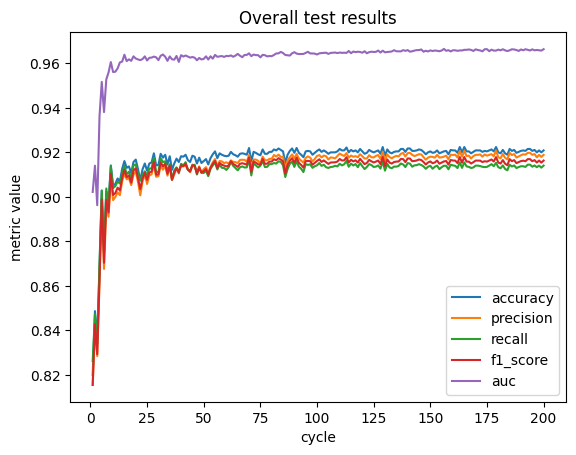

In [2]:
simulator = GossipSimulator(
    nodes=nodes,
    data_dispatcher=data_dispatcher,
    delta=100,
    protocol=AntiEntropyProtocol.PUSH,
    sampling_eval=.1
)

report = SimulationReport()
simulator.add_receiver(report)
simulator.init_nodes(seed=42)
simulator.start(n_rounds=200)

plot_evaluation([[ev for _, ev in report.get_evaluation(False)]], "Overall test results")

### Simulazione con cifratura

Output()

100925-20:24:12 INFO     # Sent messages: 41016                                                        ]8;id=833382;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py\simul.py]8;;\:]8;id=208256;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py#254\254]8;;\

                INFO     Total size: 2809596                                                           ]8;id=177669;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py\simul.py]8;;\:]8;id=483714;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py#256\256]8;;\

                INFO     Total size: 1640640                                                           ]8;id=248029;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py\simul.py]8;;\:]8;id=423277;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\simul.py#256\256]8;;\

                INFO     recall: 0.92                                                                  ]8;id=903474;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py\utils.py]8;;\:]8;id=164298;file://c:\Users\andr3\OneDrive\Università\tirocinio\gossipy\gossipy.git\gossipy\utils.py#181\181]8;;\

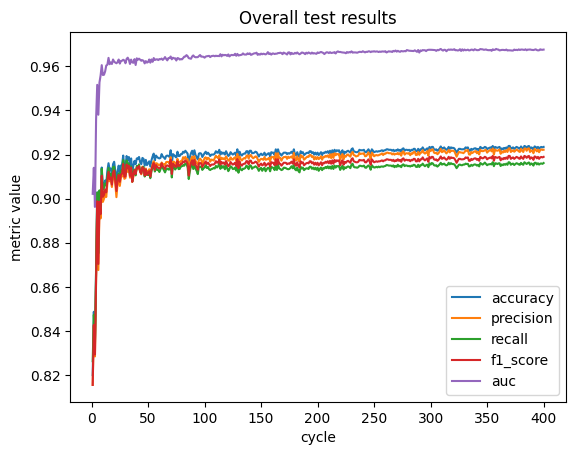

In [3]:
simulator_crypt = GossipSimulator(
    nodes=nodes,
    data_dispatcher=data_dispatcher,
    delta=100,
    protocol=AntiEntropyProtocol.PUSH,
    sampling_eval=.1,
    cryptography=True
)

report_crypt = SimulationReport()
simulator_crypt.add_receiver(report_crypt)
simulator_crypt.init_nodes(seed=42)
simulator_crypt.start(n_rounds=200)

plot_evaluation([[ev for _, ev in report.get_evaluation(False)]], "Overall test results")